In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
from PIL import Image

In [2]:
import mglearn

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, SVR
from sklearn.svm import LinearSVC, LinearSVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve


from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.tree import export_graphviz
import graphviz

# 1. Naive Bayes

- 스팸 메일 필터링에 가장 많이 사용되는 알고리즘
- 선형 모델과 유사(LogisticRegression, LinearSVC, ...)
- 훈련 속도가 빠르지만, 일반화 성능이 조금 뒤쳐진다
- 종류
    - GaussianNB : 연속적인 데이터
    - BernulliNB : 이산적인 데이터
    - MultinomialNB : 이산적인 데이터
- 하이퍼 파라미터
    - var_smooth

## (1) GaussianNB

In [4]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
model = GaussianNB().fit(X_train, y_train)

In [6]:
pred = model.predict(X_test)

In [7]:
print("정확도 : ", accuracy_score(y_test, pred))

정확도 :  0.9666666666666667


In [8]:
confusion_matrix(y_test, pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  4]], dtype=int64)

In [9]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.80      1.00      0.89         4

    accuracy                           0.97        30
   macro avg       0.93      0.97      0.95        30
weighted avg       0.97      0.97      0.97        30



## (2) MultinomialNB와 BernoulliNB

In [10]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

In [11]:
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [12]:
#### type 특성을 숫자로 매핑

df["label"] = df["type"].map({"positive" : 1 , "negative" : 0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [13]:
###### X, y로 나누기

X = df["movie_review"]
y = df["label"]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer() # 문자를 숫자로 바꿔서 기록하는 함수

X_traincv = cv.fit_transform(X)
X_traincv

encoded_input = X_traincv.toarray() # 숫자로 바꾼 것을 배열로 인코딩해서 저장
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [16]:
cv.get_feature_names() # 단어를 매칭시키는 순서

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [17]:
cv.get_feature_names_out()

array(['actors', 'again', 'also', 'amazing', 'and', 'awesome', 'boring',
       'boyfriend', 'cool', 'director', 'do', 'ever', 'from', 'great',
       'in', 'is', 'like', 'money', 'move', 'movie', 'my', 'never', 'not',
       'of', 'on', 'regret', 'said', 'shame', 'sleeping', 'the', 'this',
       'time', 'wasted', 'watch', 'what', 'will', 'year'], dtype=object)

In [18]:
# 첫번째 줄에 'actors'라는 것이 없으면 0, 있으면 1
# 첫번째 줄에 'again'이 있는가? 1번 등장했으면 1
# 첫번째 줄에 'also'가 있는가? 없으니까 0
# 첫번째 줄과 cv.get_feature_names()의 순서가 끝나면 두번째 줄로 가서 다시 시작

In [19]:
cv.inverse_transform([encoded_input[0]])
# 원래의 순서는 고려되지 않음 # 문장으로서의 정보유지 X # 오름차순
# 숫자로 인코딩 되었던 것을 다시 되돌려서 보여주는 함수

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [20]:
multi_model = MultinomialNB().fit(X_traincv, y)
bern_model = BernoulliNB().fit(X_traincv, y)

In [21]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


In [22]:
test_df["label"] = test_df["type"].map({"positive" : 1 , "negative" : 0})
test_df

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1
5,shame shame shame,negative,0
6,awesome director shame movie boring movie,negative,0
7,do not like this movie,negative,0
8,I do not like this boring movie,negative,0
9,aweful terrible boring movie,negative,0


In [23]:
X_test = test_df["movie_review"]
y_test = test_df["label"]

In [24]:
X_testcv = cv.transform(X_test)

In [25]:
multi_pred = multi_model.predict(X_testcv)
bern_pred = bern_model.predict(X_testcv)

In [26]:
print('multinomial 정확도 :', accuracy_score(y_test, multi_pred))
print('bernoulli 정확도 :', accuracy_score(y_test, bern_pred))

multinomial 정확도 : 1.0
bernoulli 정확도 : 1.0


In [27]:
# 이산변수이지만 가우시안으로도 써보자
# gauss_model = GaussianNB().fit(X_traincv, y)
# Error가 나온다
# TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

# 2. K Means

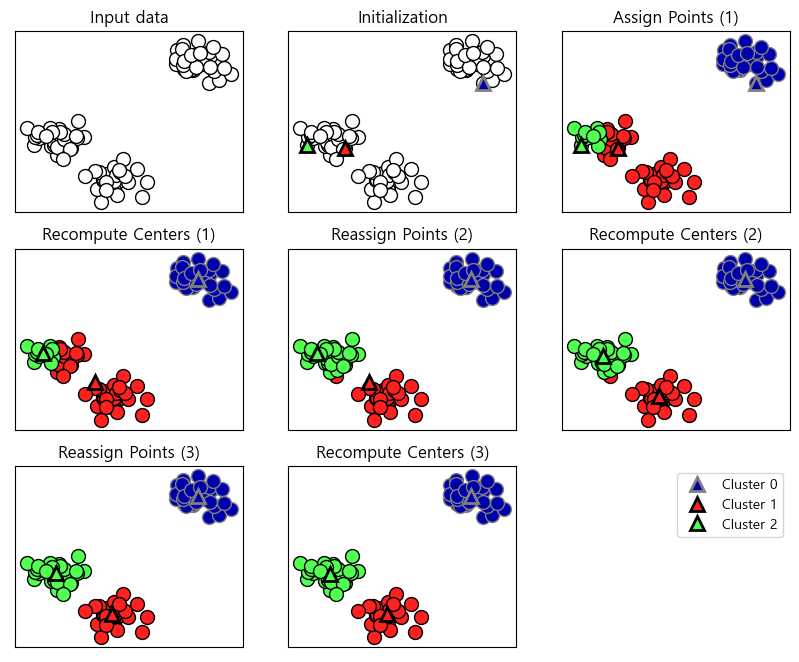

In [28]:
mglearn.plots.plot_kmeans_algorithm()

## (1) make_blobs sample

In [29]:
from sklearn.datasets import make_blobs

In [30]:
X, y = make_blobs()

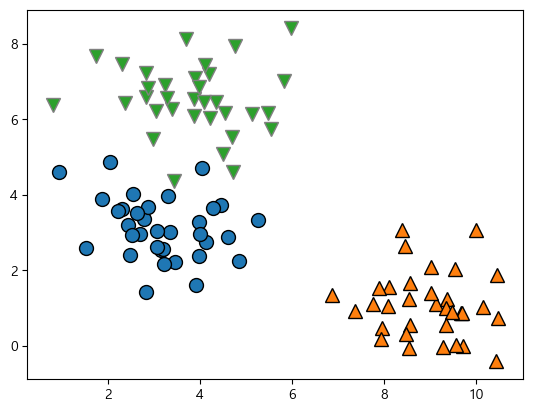

In [31]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [32]:
model = KMeans(n_clusters=3).fit(X)

In [33]:
model.labels_

array([1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1,
       0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1,
       1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2])

In [34]:
model = KMeans(n_clusters=5).fit(X)

In [35]:
model.labels_

array([1, 1, 1, 3, 3, 1, 3, 2, 1, 2, 4, 4, 4, 3, 0, 3, 3, 2, 0, 3, 4, 1,
       0, 1, 3, 1, 1, 2, 4, 1, 4, 0, 0, 2, 3, 1, 0, 0, 3, 3, 3, 2, 2, 4,
       4, 3, 1, 2, 1, 2, 4, 2, 0, 3, 1, 2, 4, 4, 1, 0, 3, 1, 1, 1, 0, 3,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 0, 3, 0, 0, 3, 3, 4, 1, 1,
       1, 1, 3, 1, 4, 2, 1, 2, 2, 3, 4, 3])

In [36]:
model.cluster_centers_

array([[2.71884487, 6.78425064],
       [8.94491832, 1.09354316],
       [2.27101264, 3.5187788 ],
       [3.82446686, 3.00898883],
       [4.60757492, 6.58153518]])

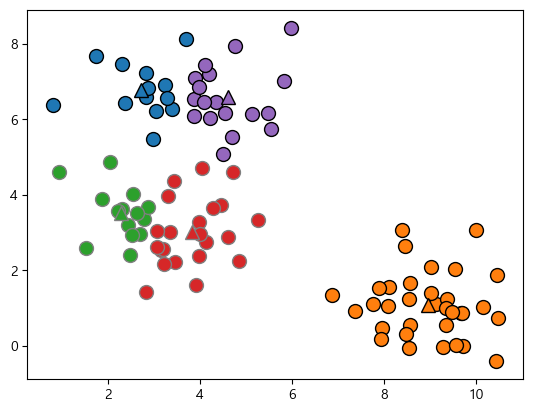

In [37]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0,1,2,3,4], markers="^")
plt.show()

## (2) iris sample

In [38]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
#X = pd.DataFrame(iris.data, columns=iris.feature_names) # 뒤에 (cm) 붙어있음..
y = pd.DataFrame(iris.target, columns=["target"])

In [41]:
X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


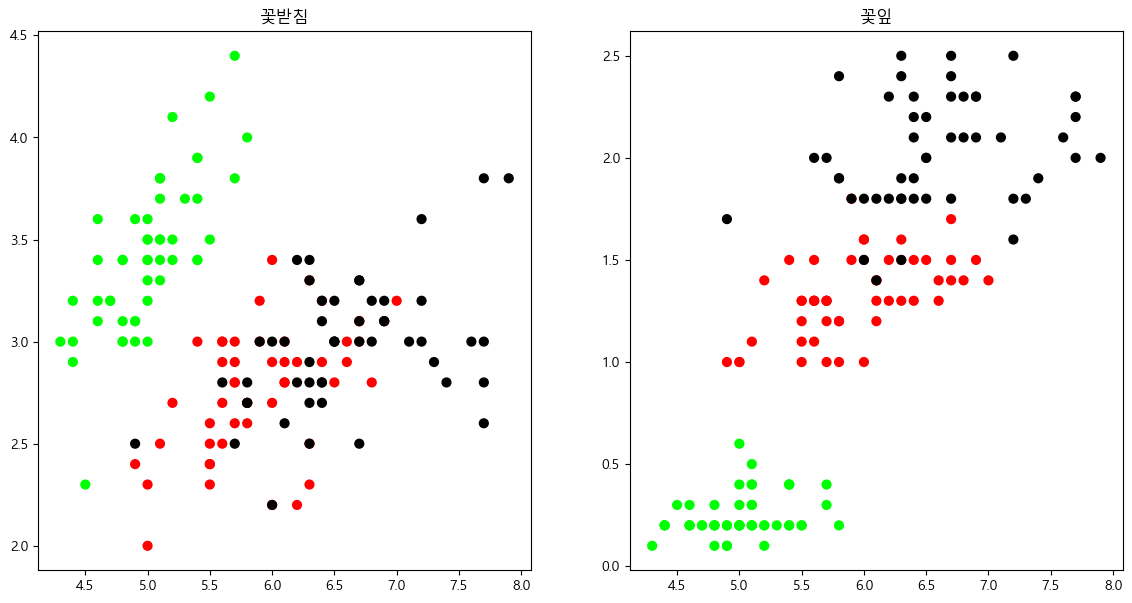

In [42]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.sepal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

plt.show()

In [43]:
model = KMeans(n_clusters=3).fit(X) # 처음 결과 0.24

In [44]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [45]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [46]:
model = KMeans(n_clusters=3).fit(X)  # 밑에 0, 1, 2 순서가 나오도록 여러번 실행해봄

In [47]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [48]:
accuracy_score(y, model.labels_) # 정답을 알려주지 않았음에도 89점까지 도달

0.8933333333333333

## (3) 사람의 키와 몸무게를 활용

In [49]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


In [50]:
df.values # 지금은 values에 "height", "weight"만 보인다

array([[185,  60],
       [180,  65],
       [185,  75],
       [165,  50],
       [170,  58],
       [155,  60],
       [157,  57],
       [162,  62],
       [173,  70],
       [171,  70]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


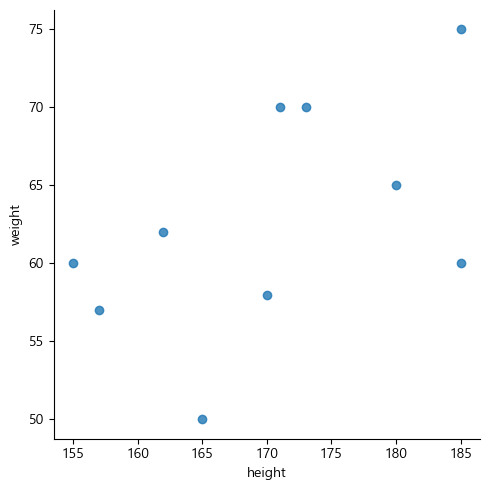

In [51]:
sns.lmplot("height", "weight", data=df, fit_reg=False)
plt.show()

In [52]:
model = KMeans(n_clusters=3).fit(df.values)

In [53]:
df.values # 아직 그대로

array([[185,  60],
       [180,  65],
       [185,  75],
       [165,  50],
       [170,  58],
       [155,  60],
       [157,  57],
       [162,  62],
       [173,  70],
       [171,  70]], dtype=int64)

In [54]:
model.labels_ # KMeans로 나눈 3개

array([1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [55]:
df["label"] = model.labels_
df["label"]

0    1
1    1
2    1
3    0
4    0
5    0
6    0
7    0
8    2
9    2
Name: label, dtype: int32

In [56]:
df.values # label 컬럼을 추가하면서 values의 값도 늘었다

array([[185,  60,   1],
       [180,  65,   1],
       [185,  75,   1],
       [165,  50,   0],
       [170,  58,   0],
       [155,  60,   0],
       [157,  57,   0],
       [162,  62,   0],
       [173,  70,   2],
       [171,  70,   2]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


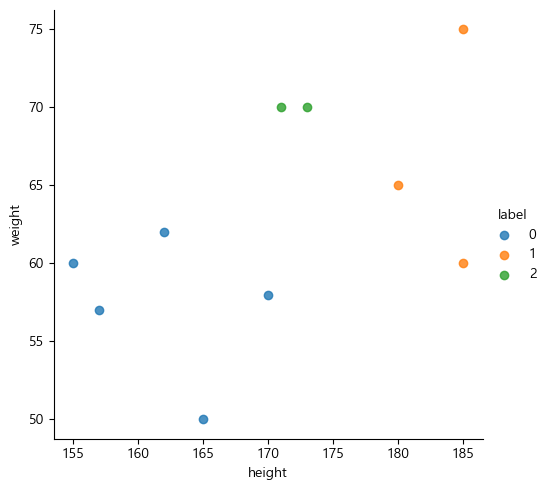

In [57]:
sns.lmplot("height", "weight", data = df, fit_reg = False, hue = "label")
plt.show()

In [58]:
?KMeans

## (4) 소비자 데이터를 이용한 마케팅 분류

In [59]:
data = pd.read_csv("data/Cluster_Customers.csv")
data.head()

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    int64 
 1   Gender  200 non-null    object
 2   Age     200 non-null    int64 
 3   Income  200 non-null    int64 
 4   Spend   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
X = data.iloc[:, [3,4]]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [62]:
# 중심값을 찾아보자

wcss = []
for i in range(1, 21):
    model = KMeans(n_clusters=i)
    model.fit_transform(X)
    wcss.append(model.inertia_) # model.inertia_ : l2 norm으로 계산한 거리 결과값
    

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
wcss

# 가장 큰값 : 중심점이 1개인 값 
# 중심점이 1개일때, 2개일 때, 3개일 때로 늘어나면서 거리값이 줄어듬
# 갑자기 크게 깎이는 부분이 있을 때 : 변곡점
# 이걸로는 알아보기 힘드니까 그래프로 그려서 확인하자

[269981.28,
 182440.30762987013,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37271.8862365895,
 30241.343617936593,
 25022.48500453035,
 21794.8856090982,
 19740.010370359305,
 17584.589416163646,
 16057.888067938415,
 14321.881821120058,
 12996.660758848993,
 11668.474544315333,
 10787.478917650977,
 9981.793549931615,
 9447.260108651415,
 8803.485897435898,
 7942.879134995439]

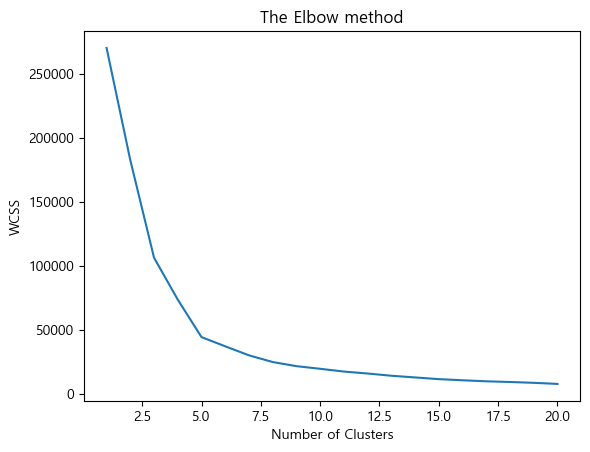

In [64]:
plt.close()
plt.figure()
plt.plot(range(1,21), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [65]:
# 훈련과 예측을 동시에!
# fit_predict()
k = 5
model = KMeans(n_clusters=k, random_state=42)
pred = model.fit_predict(X)
pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [66]:
group_cluster = pd.DataFrame(pred)
group_cluster.columns = ["Group"]
full_data = pd.concat([data, group_cluster], axis = 1)
full_data

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [67]:
model = KMeans(n_clusters=5, random_state=42).fit(X)
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [68]:
model.predict([[100,50],[30,80]])

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4, 3])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


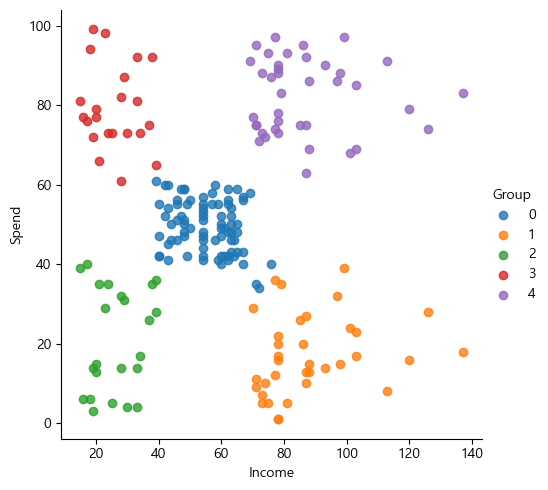

In [69]:
sns.lmplot("Income", "Spend", data = full_data, fit_reg = False, hue = "Group")
plt.show()

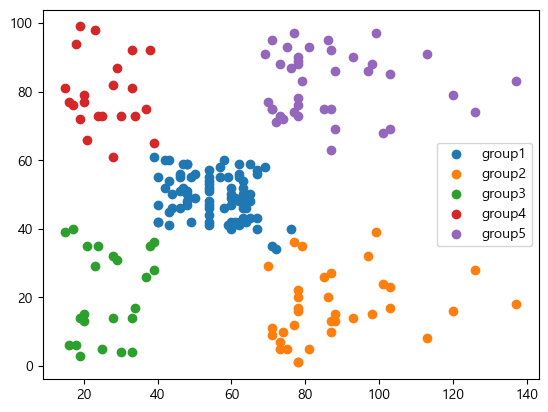

In [70]:
X = np.array(X)
labels = ["group1", "group2", "group3", "group4", "group5"]

for i in range(5):
    plt.scatter(X[pred == i, 0], X[pred == i, 1], label=labels[i])
plt.legend()    
plt.show()

In [71]:
X[pred == 1, 0] 

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [72]:
X[pred == 1, 1] 

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

# 3. 연관 규칙 분석(Association rule)

- pip install apyori

In [73]:
from apyori import apriori

In [74]:
?apriori

In [75]:
data = pd.read_csv("data/Association_Basket.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [77]:
# 트랜젝션 데이터로 변경

transactions = []

for i in range(data.shape[0]):
    transactions.append([data[j][i]
                        for j in range(data.shape[1] - data.isnull().sum(axis=1)[i])])

In [78]:
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

In [79]:
rules = apriori(transactions, min_support=0.015, min_confidence=0.2, min_lift=1, min_length=1)

In [80]:
results = list(rules)

In [81]:
print(len(results))

78


In [82]:
df = pd.DataFrame(results)
df

,items,support,ordered_statistics
0,(mineral water),0.238368,"[((), (mineral water), 0.23836821757099053, 1.0)]"
1,"(burgers, eggs)",0.028796,"[((burgers), (eggs), 0.33027522935779813, 1.83..."
2,"(french fries, burgers)",0.021997,"[((burgers), (french fries), 0.252293577981651..."
3,"(green tea, burgers)",0.017464,"[((burgers), (green tea), 0.2003058103975535, ..."
4,"(burgers, milk)",0.017864,"[((burgers), (milk), 0.20489296636085627, 1.58..."
...,...,...,...
73,"(tomatoes, spaghetti)",0.020931,"[((tomatoes), (spaghetti), 0.3060428849902534,..."
74,"(spaghetti, turkey)",0.016531,"[((turkey), (spaghetti), 0.26439232409381663, ..."
75,"(chocolate, mineral water, spaghetti)",0.015865,"[((chocolate, mineral water), (spaghetti), 0.3..."
76,"(mineral water, spaghetti, ground beef)",0.017064,"[((mineral water, ground beef), (spaghetti), 0..."


- RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]
<br>
<br>
- 지지도: 0.238 (전체 거래 중 'mineral water'가 포함된 거래의 비율)
- 신뢰도: 0.238 (전체 거래 중 'mineral water'가 발생할 조건부 확률)
- 향상도: 1.0 (규칙이 발생하는 정도가 전체 데이터에서 'mineral water'의 발생 정도와 같음)

In [83]:
df.to_csv("data/apriori_result.csv")

In [84]:
print(df.iloc[6:20][["items","support"]])

                             items   support
6             (burgers, spaghetti)  0.021464
7                     (cake, eggs)  0.019064
8             (french fries, cake)  0.017864
9            (cake, mineral water)  0.027463
10               (cake, spaghetti)  0.018131
11        (chicken, mineral water)  0.022797
12            (chicken, spaghetti)  0.017198
13               (chocolate, eggs)  0.033196
14           (escalope, chocolate)  0.017598
15       (french fries, chocolate)  0.034395
16  (chocolate, frozen vegetables)  0.022930
17        (chocolate, ground beef)  0.023064
18               (chocolate, milk)  0.032129
19      (chocolate, mineral water)  0.052660


In [85]:
ar = df.iloc[1:74]["items"]

In [86]:
ar

1                       (burgers, eggs)
2               (french fries, burgers)
3                  (green tea, burgers)
4                       (burgers, milk)
5              (burgers, mineral water)
                    ...                
69    (mineral water, whole wheat rice)
70               (olive oil, spaghetti)
71                (pancakes, spaghetti)
72                  (shrimp, spaghetti)
73                (tomatoes, spaghetti)
Name: items, Length: 73, dtype: object

In [87]:
df1 = pd.DataFrame(list(ar), columns = ["FROM", "TO"])
df1.head()

,FROM,TO
0,burgers,eggs
1,french fries,burgers
2,green tea,burgers
3,burgers,milk
4,burgers,mineral water


In [88]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [89]:
G = nx.from_pandas_edgelist(df1, source="FROM", target="TO")

In [90]:
plt.figure(figsize = (10, 10))
nx.draw_kamada_kawai(G)
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_labels(G, pos, font_size = 10, font_color="black", font_family=font_name)
nx.draw_networkx_nodes(G, pos, node_color="orange", node_size = 2000, alpha=1)

 # 4. 네트워크 분석

In [91]:
data = pd.read_csv("data/Network1_work.csv", encoding="euc-kr")
data.head()

,FROM,TO
0,기획이사,개발팀장A
1,기획이사,기획디자이너A
2,기획이사,연구대리
3,관리이사,교육대리A
4,관리이사,교육사원


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FROM    54 non-null     object
 1   TO      54 non-null     object
dtypes: object(2)
memory usage: 992.0+ bytes


In [93]:
G = nx.from_pandas_edgelist(data, source="FROM", target="TO")

plt.figure(figsize = (10, 10))
nx.draw_kamada_kawai(G)
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_labels(G, pos, font_size = 10, font_color="black", font_family=font_name)
nx.draw_networkx_nodes(G, pos, node_color="blue", node_size = 2000, alpha=0.3)

In [94]:
# 1. 연결 중심성
dgr = nx.degree_centrality(G)

# 2. 매개 중심성
btw = nx.betweenness_centrality(G)

# 3. 근접 중심성
cls = nx.closeness_centrality(G)

# 4. 페이지 랭크
pgr = nx.pagerank(G)

In [95]:
dgr

{'기획이사': 0.29411764705882354,
 '개발팀장A': 0.1764705882352941,
 '기획디자이너A': 0.1764705882352941,
 '연구대리': 0.29411764705882354,
 '관리이사': 0.29411764705882354,
 '교육대리A': 0.29411764705882354,
 '교육사원': 0.23529411764705882,
 '연구팀장': 0.23529411764705882,
 '연구원A': 0.23529411764705882,
 '연구원B': 0.23529411764705882,
 '연구원C': 0.1764705882352941,
 '개발팀장B': 0.29411764705882354,
 '개발대리': 0.23529411764705882,
 '개발자A': 0.23529411764705882,
 '개발자B': 0.1764705882352941,
 '개발자C': 0.1764705882352941,
 '교육대리B': 0.1764705882352941,
 '기획디자이너B': 0.1764705882352941}

In [96]:
btw

{'기획이사': 0.5259978991596639,
 '개발팀장A': 0.2698704481792717,
 '기획디자이너A': 0.029411764705882342,
 '연구대리': 0.2379201680672269,
 '관리이사': 0.1691176470588235,
 '교육대리A': 0.017156862745098037,
 '교육사원': 0.006127450980392156,
 '연구팀장': 0.013392857142857142,
 '연구원A': 0.14189425770308123,
 '연구원B': 0.013392857142857142,
 '연구원C': 0.0,
 '개발팀장B': 0.19467787114845936,
 '개발대리': 0.1786589635854342,
 '개발자A': 0.04061624649859944,
 '개발자B': 0.0,
 '개발자C': 0.0,
 '교육대리B': 0.0,
 '기획디자이너B': 0.07352941176470587}

In [97]:
cls

{'기획이사': 0.53125,
 '개발팀장A': 0.4594594594594595,
 '기획디자이너A': 0.3953488372093023,
 '연구대리': 0.4473684210526316,
 '관리이사': 0.4146341463414634,
 '교육대리A': 0.3269230769230769,
 '교육사원': 0.32075471698113206,
 '연구팀장': 0.3695652173913043,
 '연구원A': 0.4146341463414634,
 '연구원B': 0.3695652173913043,
 '연구원C': 0.3269230769230769,
 '개발팀장B': 0.3953488372093023,
 '개발대리': 0.425,
 '개발자A': 0.3333333333333333,
 '개발자B': 0.2982456140350877,
 '개발자C': 0.2982456140350877,
 '교육대리B': 0.3148148148148148,
 '기획디자이너B': 0.3953488372093023}

In [98]:
pgr

{'기획이사': 0.06892434114496408,
 '개발팀장A': 0.044510039939061635,
 '기획디자이너A': 0.04344731969836747,
 '연구대리': 0.06828353052358535,
 '관리이사': 0.06851771480428259,
 '교육대리A': 0.06911322915627127,
 '교육사원': 0.056538161232039336,
 '연구팀장': 0.0562265730507787,
 '연구원A': 0.05607899197555745,
 '연구원B': 0.0562265730507787,
 '연구원C': 0.04383741373081455,
 '개발팀장B': 0.07186937158151391,
 '개발대리': 0.05760652837134822,
 '개발자A': 0.05894909418445082,
 '개발자B': 0.04615649853381233,
 '개발자C': 0.04615649853381233,
 '교육대리B': 0.04374448236706473,
 '기획디자이너B': 0.043813638121496426}

In [99]:
import operator

# dict형식을 정렬하기 위해서 import operator
# 사용방법은 아래와 같다
sort_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True) 
sort_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sort_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sort_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

In [100]:
sort_dgr

[('기획이사', 0.29411764705882354),
 ('연구대리', 0.29411764705882354),
 ('관리이사', 0.29411764705882354),
 ('교육대리A', 0.29411764705882354),
 ('개발팀장B', 0.29411764705882354),
 ('교육사원', 0.23529411764705882),
 ('연구팀장', 0.23529411764705882),
 ('연구원A', 0.23529411764705882),
 ('연구원B', 0.23529411764705882),
 ('개발대리', 0.23529411764705882),
 ('개발자A', 0.23529411764705882),
 ('개발팀장A', 0.1764705882352941),
 ('기획디자이너A', 0.1764705882352941),
 ('연구원C', 0.1764705882352941),
 ('개발자B', 0.1764705882352941),
 ('개발자C', 0.1764705882352941),
 ('교육대리B', 0.1764705882352941),
 ('기획디자이너B', 0.1764705882352941)]

In [101]:
# df로 묶기 좋게 만들어주자
a = [sort_dgr, sort_btw, sort_cls, sort_pgr]
b = list(map(list, zip(*a)))

pd.DataFrame(b, columns=["연결중심성", "매개중심성", "근접중심성", "페이지랭크"])

,연결중심성,매개중심성,근접중심성,페이지랭크
0,"(기획이사, 0.29411764705882354)","(기획이사, 0.5259978991596639)","(기획이사, 0.53125)","(개발팀장B, 0.07186937158151391)"
1,"(연구대리, 0.29411764705882354)","(개발팀장A, 0.2698704481792717)","(개발팀장A, 0.4594594594594595)","(교육대리A, 0.06911322915627127)"
2,"(관리이사, 0.29411764705882354)","(연구대리, 0.2379201680672269)","(연구대리, 0.4473684210526316)","(기획이사, 0.06892434114496408)"
3,"(교육대리A, 0.29411764705882354)","(개발팀장B, 0.19467787114845936)","(개발대리, 0.425)","(관리이사, 0.06851771480428259)"
4,"(개발팀장B, 0.29411764705882354)","(개발대리, 0.1786589635854342)","(관리이사, 0.4146341463414634)","(연구대리, 0.06828353052358535)"
5,"(교육사원, 0.23529411764705882)","(관리이사, 0.1691176470588235)","(연구원A, 0.4146341463414634)","(개발자A, 0.05894909418445082)"
6,"(연구팀장, 0.23529411764705882)","(연구원A, 0.14189425770308123)","(기획디자이너A, 0.3953488372093023)","(개발대리, 0.05760652837134822)"
7,"(연구원A, 0.23529411764705882)","(기획디자이너B, 0.07352941176470587)","(개발팀장B, 0.3953488372093023)","(교육사원, 0.056538161232039336)"
8,"(연구원B, 0.23529411764705882)","(개발자A, 0.04061624649859944)","(기획디자이너B, 0.3953488372093023)","(연구팀장, 0.0562265730507787)"
9,"(개발대리, 0.23529411764705882)","(기획디자이너A, 0.029411764705882342)","(연구팀장, 0.3695652173913043)","(연구원B, 0.0562265730507787)"
